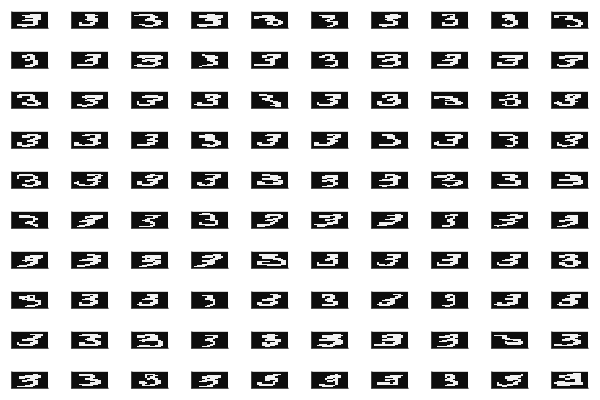

In [3]:
using MLDatasets
using Plots
using Statistics
using Distributions
using Random

train = 100

digit = 3 # Digit to be learned
image_size = 28 # Size of image
compress_size = 14 # Size of compressed image

function compress(img, original, compress, max = true) #If max is false, then it does mean-convolution instead
    ratio = original ÷ compress
    compressed = zeros(compress, compress)
    a = []
    for i in 0:compress-1
        for j in 0:compress-1
            empty!(a)
            for p in 1:ratio
                for q in 1:ratio
                    push!(a, img[(ratio*i) + p, (ratio*j) + q])
                end
            end
            compressed[i+1, j+1] = max ? maximum(a) : mean(a)
        end
    end
    return compressed
end

train_set = MNIST(:train)
train_labels = MNIST(split=:train).targets

data_train = []
c = 1
trainstats = []
for _ in 1:train
    while train_labels[c] != digit
        c += 1
    end
    push!(data_train, compress(rotl90(train_set[c][1]), image_size, compress_size) .> 0.5)
    push!(trainstats, sum(train_set[c][1] .> 0.5))
    c += 1
end

plot([heatmap(x, color=:grays, colorbar = false, ticks = false) for x in data_train]...) #Is there any way to make this look nicer? oh well it's not a big deal


In [27]:
using Yao
using FLOYao
using Flux

N = compress_size^2 #Number of qubits

function NeuralNetwork(num_dim = N, random = true)
    net = Chain(Dense(num_dim, 25,relu), Dense(25,1,x->σ.(x)))
    if(!random)
        for p in Flux.params(net)
            p .= (ones(size(p)) .* 0.08)
        end
    end
    return net
end

d = NeuralNetwork() #Parameters are random (typically is N(0, sqrt(width)), not really sure how it's implemented)
print(Flux.params(d))

layers = 5
g = chain(N) #Making the generator, which is a matchgate ansatz; this just uses Yao though? or does saying "using FLOYao" somehow change the implementation... Not really sure
for _ in 1:layers
    for i in 1:N-1
        push!(g, rot(kron(N, i => X, i+1 => X), 0.))
    end
    for i in 1:N
        push!(g, put(N, i => Rz(0.)))
    end
end

nparams = nparameters(g)
print("Number of parameters: $nparams")  
dispatch!(g, ones(nparams) ./ 100); 

Params([Float32[0.11704207

 -0.044193245 0.14472471 -0.04696458 0.07720841 -0.026632434 0.031364016 0.13984293 0.14060378 0.0320819 -0.09846544 0.15740594 -0.100955464 0.09716016 -0.10074541 0.1187377 -0.12457604 0.110132284 0.0972074 -0.030002108 -0.1643228 0.034607727 -0.10501727 -0.04517296 -0.088928305 -0.059723392 -0.018482404 -0.09534721 -0.14068359 0.030080205 -0.14286184 0.13896376 -0.004678727 -0.094830975 -0.13567527 -0.12629245 -0.1627213 0.041056175 -0.12016716 -0.06018076 0.07692691 -0.038419783 -0.0068483427 -0.12031204 0.0031762382 0.106433526 0.0059645036 0.12584941 0.14471409 0.08425616 -0.020825008 0.15353909 -0.009737098 -0.02382368 0.07522046 -0.12266362 0.12495753 -0.09879209 -0.120396264 -0.15160723 -0.15901239 0.15882707 -0.1002476 -0.12072837 0.12747116 -0.021475734 -0.15209864 -0.06455794 0.05743429 -0.0599612 0.15169385 0.06573871 -0.1276404 -0.12938054 -0.16005397 0.11361598 0.0082026515 0.08819736 0.106426984 -0.13555546 -0.024495581 -0.026308496 -0.0653659 -0.11006486 0.13949767 0.06

 -0.053070232 -0.10565155 0.06686289 0.15456171 0.048601832 -0.08741002 0.02853087 -0.09697476 0.0964664 0.08511951 0.0410634 -0.06578365 0.12642205 0.08450267 0.10507222 0.12895146 -0.10957602 -0.058079556 0.12884307 -0.05330696 -0.061692815 -0.13118897 -0.11149803 0.10411769 -0.05325198 -0.051439833 0.050682433 -0.11475792 0.046269484 -0.073537596 -0.011619172 0.10832181 -0.14284319 0.070138775 0.10871551 0.09581518 0.118579544 0.08405254 0.0034506784 0.087024406 -0.08474534 -0.07800014 0.16234569 -0.081948176 -0.13879831 0.07206325 0.0999555 -0.13097821 -0.08814267 0.16062735 -0.040889 -0.042258903 -0.0882541 0.05841976 0.13913488 0.12825437 -1.4928054f-5 -0.13541794 0.09273572 -0.11783316 0.04535406 -0.07911128 0.042805232 0.09062112 0.08775341 0.15744036 -0.065988734 -0.030494066 0.12999482 0.010754366 -0.0014920001 0.1487101 0.09716967 0.1198202 0.06476412 0.1387417 -0.10214639 0.15055406 -0.10667837 -0.10040022 0.067244224 0.09367061 -0.14852412 -0.032594856 -0.06808078 0.079230

 0.13760965 -0.05339757 -0.10714078 -0.009236163 0.1187225 -0.14625785 -0.09888349 -0.06672423 0.087837614 0.04813655 -0.07398049 0.135213 -0.020073518 -0.016083367 0.12993458 0.14826353 -0.011116784 -0.04949339 -0.086039156 0.10935705 0.051635273 0.13735646 0.07664572 0.1001708 -0.060829736 0.042842295 -0.13869946 -0.14542821 0.117659956; 0.063104376 0.11886125 0.11962032 0.10329268 0.09852932 0.1420813 -0.08926524 -0.09482488 -0.010589902 0.0527272 0.05656595 0.16037858 0.13135467 0.074368246 -0.15152128 -0.037116267 0.11517732 0.15320058 -0.0495984 0.07154704 0.029622052 0.12734549 0.04463918 0.09043289 -0.10097393 0.085351266 -0.04286233 -0.110444084 -0.12091113 0.115482144 0.062034056 -0.054152105 -0.01104509 0.07644427 0.0706689 0.0049672704 -0.053688508 -0.0004553449 0.028132938 -0.0033048159 0.13040498 -0.09559786 0.13270937 -0.065570235 0.121271856 0.08565847 -0.003553623 -0.10305706 0.13229209 -0.048737425 0.11304408 -0.15608716 0.07698303 -0.05213886 -0.025137624 0.10802242 

 -0.0836301 0.1396778 -0.13707198 0.14949451 0.12900722 0.0823271 -0.06522 0.118029304 -0.13597345 -0.079532154 -0.118856125 0.04665828 -0.16186607 -0.066959985 0.037732188 -0.16282627 -0.012919445 0.040586237 0.018004509 0.040981535 -0.057093263 -0.1455074 -0.06411169 0.06458393 0.10591955 0.07490023 0.08944224 0.05788019 0.06067592 0.08325833 0.055532537 0.014001591 -0.05196218 -0.010656018 0.13000363 -0.13527875 0.1237506 -0.037005644 0.04352162 0.11630456 0.060005415; -0.08243951 -0.027971618 -0.16331731 0.010395936 -0.15029281 0.0112186875 0.06508282 -0.11757592 0.055647973 0.029622365 -0.09642407 0.08269668 0.061022308 0.10008728 0.10431459 0.031791862 -0.1587509 0.00042051935 0.089546144 0.03322967 -0.13408557 -0.08576524 0.13516982 0.1065921 0.12297238 -0.004553469 -0.116107 -0.14411308 -0.1249985 -0.041806113 0.056904797 -0.12320404 0.11189961 -0.09482661 0.12756497 -0.13732588 -0.10275274 0.069746286 0.0051298686 0.12020424 0.14108545 -0.101863675 0.1341336 0.057778247 -0.004

 0.12538955 -0.1277957 -0.09501932 0.13352872 0.040009364 -0.026337134 0.110979766 0.13182981 -0.15904263 0.16108216 -0.011418527 0.026729112 0.07960096 -0.0464486 -0.07341073 0.13320045 -0.03751133 0.09114066 0.16320015 -0.06296005 0.14964691 -0.075708255 -0.13300595 -0.14895855 0.068202704 -0.14788182 0.14226454 0.09989557 -0.021242935 0.027962249 0.07709412 0.071236886 0.025684796 -0.030287568 0.06314693 -0.09843121 -0.02185088 -0.13334239 0.026077798 0.09071258 -0.09160697 0.10418369 -0.0020267584 -0.12476313 0.030377254 -0.12253565 0.061021995 0.15752214 0.018473506 -0.13428913 0.111958854 0.08019443 -0.070736565 -0.1145578 -0.07167748 -0.02259469 0.034198146 0.10713308 0.13120581 0.007820257 -0.14082617 -0.09473922 0.12215102 0.056358784 -0.077685595 -0.09496538 0.159045 -0.13707057 0.07268656 -0.060835905 -0.014655499 0.06359695 0.038851418 0.08391206 0.05104862 0.13020647 -0.08831951 0.043744974 -0.070233524 0.01669473 -0.10907206 -0.0010682005 0.110352576 0.075003885 0.0407280

 -0.073763445 0.09560884 -0.03357113 0.056074485 -0.073547654 0.14209409 -0.07340362 0.03210392 -0.041201644 -0.098592155 0.13642904 -0.138223 -0.1472259 0.13600038 0.010467159 0.13443816 -0.13332796 -0.032492362 0.0079444945 -0.13641837 0.062252045 0.09919986 0.041428648 0.11737844 0.02377656 -0.088263705 0.08046317 -0.09156676 -0.028847639 0.0046320376 0.08047531 -0.08516121 0.07250719 -0.15647458 -0.051960606 0.112256825 -0.0191326 -0.012867059 0.13631052 0.1195084 0.15295583 0.0856413 0.1282597 -0.032780867 -0.1452101 0.028791305 -0.0011117865 0.13147536 0.15838695 0.04108927 -0.01367508 -0.09226006 0.1454482 -0.016533645 0.027046295 -0.03801908 -0.00021710497 0.010251841 -0.036379274 -0.1027364 -0.11011985 0.07768467 -0.06858565 0.0104667265 0.10245288 0.06454466 -0.033674095 0.11363988 -0.03310398 -0.034459095 0.09278359 0.10948932 0.017022558 0.05110965 0.07965138; 0.03268843 0.07348203 0.11703661 -0.09140396 0.016334886 0.14333658 -0.09532888 -0.028461277 0.08936086 0.16295214 

 -0.0669324 0.08954719 -0.04346615 -0.10305768 -0.102818206 -0.14988512 0.12761648 -0.13681467 0.04326313 0.15615098 0.012736969 -0.07149601 -0.14195667 0.05380585 0.094178125 -0.04922125 0.06099591 0.010328759 0.109092526 0.1080085 0.106360435 0.045430407 -0.059884556 0.1271408 -0.01753626; 0.14541721 -0.00831691 0.0018956074 0.10195334 -0.022592293 -0.05869756 -0.11432086 0.047150552 0.13772628 -0.10604744 0.15880482 -0.117147826 -0.08799086 -0.07030544 -0.10761292 -0.035388622 0.013551019 0.0140102925 -0.009227168 0.07060111 -0.10143801 0.07851663 0.012520924 0.08119095 0.0012639937 0.14138933 -0.10900718 0.041493095 -0.015019488 -0.10223607 0.04952531 0.0106242765 0.13172138 -0.06112376 0.14653996 0.014280098 -0.15868607 -0.15246692 0.043515805 -0.07455306 0.15418464 -0.023604475 -0.07970461 0.14692694 -0.15116426 -0.08377598 0.08524995 0.15860733 -0.061529607 -0.07789067 -0.046428524 -0.071088396 -0.099390335 -0.0483644 0.06832219 -0.0016522016 -0.16256656 -0.081333436 -0.04168374

Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.40454736 0.3576643 0.47976777 0.07076275 -0.32087058 -0.033549514 -0.26796156 0.18200698 0.44523492 0.37424117 0.073581174 -0.38248459 0.35066074 -0.42214546 -0.16528392 -0.041321523 0.3685821 0.14272805 -0.3767169 -0.09101309 0.20548205 -0.22290498 -0.077355996 -0.06818148 0.17999895], Float32[0.0]])Number of parameters: 1955

113.4375
35.05798767756073


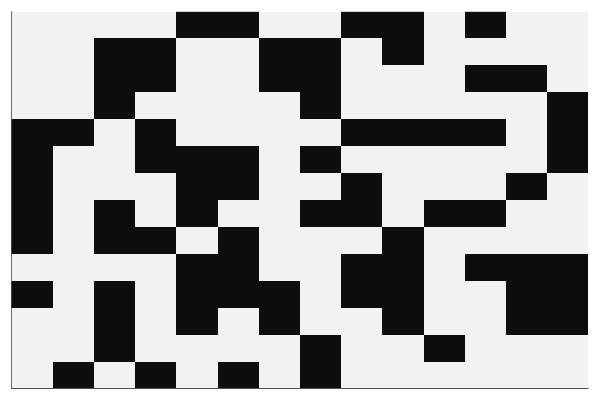

In [34]:
using FLOYao
using Random
using Distributions

#Not sure if there is a better pprior that we can choose, sometimes u get a lot of white or black bc variance is high
mu = mean(trainstats)
sigma = std(trainstats)
println(mu)
println(sigma)
dist = Normal(mu, sigma/10)
ratio = rand(dist) / N
function pprior() #For each square, probability 1/ratio that it's white, where ratio ~ N(mean(data), std(data)) /  N; maybe we can vary pprior later?
    global a = rand(N) .< ratio
    return FLOYao.product_state(Int.(a)) #Returns MajoranaReg; Prepares it to be sent through the generator 
end

heatmap(rotl90(reshape(a, compress_size, compress_size)) .> 0.5, color=:grays, colorbar = false, ticks = false)

In [37]:
using Flux: train!

batch_size = 10 #Are you supposed to randomly pick batch_size data points at random each time? idk

#g takes as input x = Int.(pprior()); FLOYao.product_state(x)
#d takes as input measure(x |> g)

function convertgd(g_output::Vector) #converts the output of reg |> g |> measure to 
    result = []
    for i in 1:N 
        push!(result, g_output[1][end - i + 1])
    end
    result
end

function run_circuit(z::MajoranaReg) #z is a MajoranaReg drawn from pprior; this function applies D(G(z))
    g_output = z |> g |> measure
    d_input = convertgd(g_output)
    d_output = d_input |> d
    d_output[1]
end

z = pprior()
println(run_circuit(z))

function run_d(x::BitMatrix) #this function applies D(x), where x is an element of data_train 
    d_output = x |> vec |> d
    d_output[1]
end

function gLoss(fake::Vector) #fake is the output of D(G(z))
    sum(log.(1 .- fake)) / length(fake)
end
#CALCULATE GRADIENTS USING THIS FUNCTION

#does the function need to explicitly depend on d?
# function dLoss(real, fake) #the first half of data is D's output on real, the second half is D's output on fake
#     println(real)
#     println(fake)
#     l = length(real)
#     - ((sum(log.(real)) + sum(log.(1 .- fake))) / l)
# end

function dLoss(d, real, fake)
    -(log(real) + log(1 - fake))
end

# Worry about this another day
# function gradient(op, reg::MajoranaReg) #use AD with FLOYao?
#     _, params_grad = expect'(op, reg => g)
# end

g_lr = 0.2 #change later? not sure what the best learning rate is
d_lr = 0.5
#d_opt = Descent(d_lr) #Do gradient descent, maybe try ADAM or other things later?
d_opt = Flux.setup(Adam(), d)
gLoss_values = []
dLoss_values = []

epochs = 100
for i in 1:epochs
    real = []
    fake = []
    for m in 1:batch_size #Always uses the first batch_size data points hmm
        x = data_train[m]
        push!(real, run_d(x))
        z = pprior()
        push!(fake, run_circuit(z))
    end
    data = collect(zip(real, fake))
    #println("asdf")
    g_l = gLoss(fake)
    #println("asdf")
    # d_l = dLoss(data)
    # println("asdf")
    #println("Generator loss: $g_l")  
    push!(gLoss_values, g_l)
    #println("Discriminator loss: $d_l")  
    #push!(dLoss_values, d_l)

    # grad = gradient(qg) I'm not really sure how to compute the gradients of G
    # dispatch!(-, g, grad*g_lr) #Rule is - (as specified by first input), this is just gradient descent

    train!(dLoss, d, data, d_opt) #Not sure if this is what I really want...
    print(Flux.params(d)) #THEY'RE NOT BEING UPDATED 
    s = 0
    for x in data
        s += dLoss(d, x[1], x[2])        
    end
    println("Discriminator loss: ", s / batch_size)
end

plot(gLoss_values)

0.5266857


Params([Float32[0.11704207 -0.044193245 0.14472471 -0.04696458 0.07720841 -0.026632434 0.031364016 0.13984293 0.14060378 0.0320819 -0.09846544 0.15740594 -0.100955464 0.09716016 -0.10074541 0.1187377 -0.12457604 0.110132284 0.0972074 -0.030002108 -0.1643228 0.034607727 -0.10501727 -0.04517296 -0.088928305 -0.059723392 -0.018482404 -0.09534721 -0.14068359 0.030080205 -0.14286184 0.13896376 -0.004678727 -0.094830975 -0.13567527 -0.12629245 -0.1627213 0.041056175 -0.12016716 -0.06018076 0.07692691 -0.038419783 -0.0068483427 -0.12031204 0.0031762382 0.106433526 0.0059645036 0.12584941 0.14471409 0.08425616 -0.020825008 0.15353909 -0.009737098 -0.02382368 0.07522046 -0.12266362 0.12495753 -0.09879209 -0.120396264 -0.15160723 -0.15901239 0.15882707 -0.1002476 -0.12072837 0.12747116 -0.021475734 -0.15209864 -0.06455794 0.05743429 -0.0599612 0.15169385 0.06573871 -0.1276404 -0.12938054 -0.16005397 0.11361598 0.0082026515 0.08819736 0.106426984 -0.13555546 -0.024495581 -0.026308496 -0.0653659 -

 0.06705369 -0.0952203 -0.053070232 -0.10565155 0.06686289 0.15456171 0.048601832 -0.08741002 0.02853087 -0.09697476 0.0964664 0.08511951 0.0410634 -0.06578365 0.12642205 0.08450267 0.10507222 0.12895146 -0.10957602 -0.058079556 0.12884307 -0.05330696 -0.061692815 -0.13118897 -0.11149803 0.10411769 -0.05325198 -0.051439833 0.050682433 -0.11475792 0.046269484 -0.073537596 -0.011619172 0.10832181 -0.14284319 0.070138775 0.10871551 0.09581518 0.118579544 0.08405254 0.0034506784 0.087024406 -0.08474534 -0.07800014 0.16234569 -0.081948176 -0.13879831 0.07206325 0.0999555 -0.13097821 -0.08814267 0.16062735 -0.040889 -0.042258903 -0.0882541 0.05841976 0.13913488 0.12825437 -1.4928054f-5 -0.13541794 0.09273572 -0.11783316 0.04535406 -0.07911128 0.042805232 0.09062112 0.08775341 0.15744036 -0.065988734 -0.030494066 0.12999482 0.010754366 -0.0014920001 0.1487101 0.09716967 0.1198202 0.06476412 0.1387417 -0.10214639 0.15055406 -0.10667837 -0.10040022 0.067244224 0.09367061 -0.14852412 -0.03259485

 0.07854771 -0.115936786 -0.03434896 -0.108733624 -0.13129584 0.063502 0.0037922168 -0.15589796 -0.0939674 -0.07996956 -0.061234187 0.11374495 -0.15626603 -0.006823417 -0.13428219 0.05399746 -0.12279065 -0.0025727714 0.1049521 0.11603283 0.12384763 0.073320076 -0.085036874 -0.12007844 0.13757348 0.044443507 0.16337955 0.14320557 0.08479718 0.1629559 -0.016415948 -0.025498845 -0.043027267 0.07982176 -0.027365498 -0.08708292 0.0877262 0.13400888 0.09014093 -0.14213267 -0.12209761 0.08617414 -0.015075566 0.114689626 0.14115556 0.13550499 0.10729464 -0.060455553 -0.08980185 -0.14891219 -0.0377251 5.5469503f-5 -0.12617102 0.05562385 0.010458378 -0.12026392 -0.08326607 0.079625376 0.1635678 -0.09819507 -0.1446575 -0.14900148 0.016795533 0.067189045 0.060091425 0.10884065 -0.06489623 0.0637337 0.10501703 -0.119552985 0.06438931 -0.10876342 -0.099603705 -0.09287541 -0.13356327 -0.050601527 -0.071290396 -0.1591371 0.06253927 0.09167355 0.1634473 0.13962933 -0.08089797 -0.15463682 0.057240818 0.

 0.0014495925 -0.035887983 0.15218158 0.15980862 0.14072452 0.062483273 0.1642012 0.09363003 -0.11001404 -0.09681187 -0.108407624 -0.07558685 0.010692337 0.15586258 0.14115876 -0.0006068254 0.03460136 0.14435558 0.12231696 0.0736155 0.12955643 -0.07882949 0.041465223 -0.09397742 -0.044077516 -0.10501129 0.1236849 -0.12137319 0.009660591 0.023097372 0.07878451 0.03914707 -0.12819462 -0.074260764 -0.008714212 -0.07745311 -0.14256111 0.15276223 0.09848237 0.15816884 0.15078872 -0.14854345 0.11662043 0.016973669 0.10844288 0.05893295 0.08647794 -0.03858692 -0.07850824 -0.06553767 -0.08384646 0.13304724 -0.09017854 -0.08442873; -0.11582956 0.02976039 -0.017151332 0.04314184 -0.05385755 0.022863945 -0.124889135 0.028757736 0.036954455 0.08351622 0.08369299 -0.13869892 0.092368826 -0.009383735 -0.036672316 0.15739718 0.010508014 0.11178739 -0.007088999 0.09379919 -0.035847384 0.008677442 -0.15178606 -0.09860286 -0.13672769 -0.14531107 -0.06883905 0.05084784 0.15279493 -0.12371377 0.03674566 0

 -0.05513431 -0.16347463 0.045819893 -0.12361188 -0.15705204 0.09344999 -0.014595334 0.09057441 0.108550146 -0.03416073 -0.15085632 0.1222475 0.10258794 -0.15100501 0.05363194 0.1134 0.10973713 0.10153125 -0.11980775 -0.086067304 0.030977067 -0.03975058 -0.110423975 -0.019135348 -0.12458867 0.014093536 0.16369317 -0.093377076 0.064116046 0.076815106 -0.07527713 -0.13548082 -0.005584801 0.014437038 -0.013630609 0.017057108 0.113110475 0.11501384 0.03304576 0.096539095 0.07684412 0.16381001 -0.15413415 0.03455147 0.08597506 0.13804299 0.021703308 0.0760482 0.095906205 -0.036974452 -0.004949828 0.14370656 0.11878079 -0.15934162 -0.06980853 0.059031673 -0.10720079 0.15055858 0.16200629 -0.009256788 0.04560485 -0.073371425 0.0960667 -0.115818344 0.02764536 -0.08268325 0.037119333 -0.11340607 0.038393363 -0.09642381 -0.1011422 -0.09453027 0.0080932835 0.051325243 -0.0949559 0.008634406 -0.15781638 0.09215368 0.10976315 -0.030353762 -0.07139041; -0.14311546 -0.054021012 -0.05243571 -0.0977958

 -0.05825787 -0.03322077 -0.028158767 0.14204165 -0.003049428 0.1314084 -0.033927362 -0.058229525 0.044539813 -0.098932065 0.12617871 -0.1286038 -0.05752217 -0.11414067 0.11707825 0.006915008 -0.028110133 -0.03778153 0.15271817 -0.16261208 0.15251529 0.12526268 -0.14493597 0.14896093 -0.1294761 -0.11526701 0.11866043 0.06695431 0.062461432 0.12183812 0.0303023 0.067346305 -0.15963534 0.13962798 -0.16101332 0.023752026 -0.07750919 -0.10704909 0.15350297 -0.07262227 0.061786585 0.03783515 0.003652659 -0.048482645; -0.014796962 0.091696806 -0.13494387 0.06579982 -0.10401909 -0.0874485 0.107996255 -0.03971316 0.021829724 0.026023898 0.15167907 0.0973721 -0.09566926 0.07613671 -0.12456263 0.086114086 -0.120504 -0.11854933 0.0046212147 -0.10836123 0.03187375 0.02840017 -0.09845147 -0.05686514 0.024042927 0.12271874 -0.00078181754 0.069211975 0.053063672 -0.07610683 0.0030570494 -0.15495065 0.12836121 -0.014042467 0.030335376 0.12816869 0.15172815 -0.062356897 0.0033290936 -0.14569639 0.11528

 0.083888724 0.11694793 0.1088204 -0.029375562 0.013227807 0.14197783 0.086758666 -0.06357147 -0.079001166 -0.015219917 -0.014296676 0.12146333 -0.087328404 -0.024460755 -0.13759895 0.15097655 0.09927081 0.1100999 -0.013475908 0.0036201316 -0.023935817 -0.07814781 0.11664799 0.02997068 -0.019886583 -0.0027067508 -0.10476563 -0.040555652 0.04949726 -0.11612525 -0.068500556 -0.0067523713 0.15615019 0.1643744 0.12028008 0.112579286 -0.11962584 -0.08832328 -0.14406241 -0.07461902 -0.16079393 0.123795874 -0.1434986 -0.09324791 0.1617331 0.13150385 -0.15162927 0.03331158 -0.055030875 0.12637344 0.11018809 -0.08316558 0.14392129 0.057492808 0.10378175 0.0024744624 -0.11893068 0.13034138 -0.01792759 -0.10565037 -0.012446677 0.14891134 -0.019917853 0.04715676 0.084431894 -0.06650923 -0.10969081 -0.05580788 0.11038288 -0.09723402 0.03914401 0.04761177 0.020511243 0.067687586 0.12093101 0.08729777 0.059443943 -0.11611117 -0.14186451 0.03331268 0.1301518 0.018504716 -0.03537654 -0.033305332 0.1291

Params([Float32[0.11704207 -0.044193245 0.14472471 -0.04696458 0.07720841 -0.026632434 0.031364016 0.13984293 0.14060378 0.0320819 -0.09846544 0.15740594 -0.100955464 0.09716016 -0.10074541 0.1187377 -0.12457604 0.110132284 0.0972074 -0.030002108 -0.1643228 0.034607727 -0.10501727 -0.04517296 -0.088928305 -0.059723392 -0.018482404 -0.09534721 -0.14068359 0.030080205 -0.14286184 0.13896376 -0.004678727 -0.094830975 -0.13567527 -0.12629245 -0.1627213 0.041056175 -0.12016716 -0.06018076 0.07692691 -0.038419783 -0.0068483427 -0.12031204 0.0031762382 0.106433526 0.0059645036 0.12584941 0.14471409 0.08425616 -0.020825008 0.15353909 -0.009737098 -0.02382368 0.07522046 -0.12266362 0.12495753 -0.09879209 -0.120396264 -0.15160723 -0.15901239 0.15882707 -0.1002476 -0.12072837 0.12747116 -0.021475734 -0.15209864 -0.06455794 0.05743429 -0.0599612 0.15169385 0.06573871 -0.1276404 -0.12938054 -0.16005397 0.11361598 0.0082026515 0.08819736 0.106426984 -0.13555546 -0.024495581 -0.026308496 -0.0653659 -

 0.06705369 -0.0952203 -0.053070232 -0.10565155 0.06686289 0.15456171 0.048601832 -0.08741002 0.02853087 -0.09697476 0.0964664 0.08511951 0.0410634 -0.06578365 0.12642205 0.08450267 0.10507222 0.12895146 -0.10957602 -0.058079556 0.12884307 -0.05330696 -0.061692815 -0.13118897 -0.11149803 0.10411769 -0.05325198 -0.051439833 0.050682433 -0.11475792 0.046269484 -0.073537596 -0.011619172 0.10832181 -0.14284319 0.070138775 0.10871551 0.09581518 0.118579544 0.08405254 0.0034506784 0.087024406 -0.08474534 -0.07800014 0.16234569 -0.081948176 -0.13879831 0.07206325 0.0999555 -0.13097821 -0.08814267 0.16062735 -0.040889 -0.042258903 -0.0882541 0.05841976 0.13913488 0.12825437 -1.4928054f-5 -0.13541794 0.09273572 -0.11783316 0.04535406 -0.07911128 0.042805232 0.09062112 0.08775341 0.15744036 -0.065988734 -0.030494066 0.12999482 0.010754366 -0.0014920001 0.1487101 0.09716967 0.1198202 0.06476412 0.1387417 -0.10214639 0.15055406 -0.10667837 -0.10040022 0.067244224 0.09367061 -0.14852412 -0.03259485

 0.0022979185 -0.003997183 0.13760965 -0.05339757 -0.10714078 -0.009236163 0.1187225 -0.14625785 -0.09888349 -0.06672423 0.087837614 0.04813655 -0.07398049 0.135213 -0.020073518 -0.016083367 0.12993458 0.14826353 -0.011116784 -0.04949339 -0.086039156 0.10935705 0.051635273 0.13735646 0.07664572 0.1001708 -0.060829736 0.042842295 -0.13869946 -0.14542821 0.117659956; 0.063104376 0.11886125 0.11962032 0.10329268 0.09852932 0.1420813 -0.08926524 -0.09482488 -0.010589902 0.0527272 0.05656595 0.16037858 0.13135467 0.074368246 -0.15152128 -0.037116267 0.11517732 0.15320058 -0.0495984 0.07154704 0.029622052 0.12734549 0.04463918 0.09043289 -0.10097393 0.085351266 -0.04286233 -0.110444084 -0.12091113 0.115482144 0.062034056 -0.054152105 -0.01104509 0.07644427 0.0706689 0.0049672704 -0.053688508 -0.0004553449 0.028132938 -0.0033048159 0.13040498 -0.09559786 0.13270937 -0.065570235 0.121271856 0.08565847 -0.003553623 -0.10305706 0.13229209 -0.048737425 0.11304408 -0.15608716 0.07698303 -0.0521388

 0.012827912 0.08401114 0.10781219 -0.1314837 -0.15369788 0.029878793 0.044814035 0.13141622 -0.15361309 -0.035791915 -0.11921426 -0.08933209 0.14892031 0.03216964 0.113015406 0.05897756 -0.038684167 -0.0979682 -0.14992806 -0.1606426 0.13569355 -0.021712402 0.08990878 -0.013812732 0.027843669 -0.027921079 0.08521483 0.010185882 0.0656348 0.027842863 0.13831179 0.13420369 -0.0536352 -0.056364324 0.02090839 0.06362692 0.0054184515 0.16255328 0.05590381 -0.0836301 0.1396778 -0.13707198 0.14949451 0.12900722 0.0823271 -0.06522 0.118029304 -0.13597345 -0.079532154 -0.118856125 0.04665828 -0.16186607 -0.066959985 0.037732188 -0.16282627 -0.012919445 0.040586237 0.018004509 0.040981535 -0.057093263 -0.1455074 -0.06411169 0.06458393 0.10591955 0.07490023 0.08944224 0.05788019 0.06067592 0.08325833 0.055532537 0.014001591 -0.05196218 -0.010656018 0.13000363 -0.13527875 0.1237506 -0.037005644 0.04352162 0.11630456 0.060005415; -0.08243951 -0.027971618 -0.16331731 0.010395936 -0.15029281 0.011218

 -0.11693184 -0.035351597 0.083389245 -0.06900644 0.06554942 0.058220234 -0.00060647185 -0.12633839 -0.13250366 -0.16310644 -0.14891234 -0.12349812 -0.09809397 -0.05509917 -0.009763458 0.099055395 -0.13977948 -0.06723071 -0.127075 -0.109117985 0.108518526 -0.0578148 -0.040167384 -0.073205136 -0.09866377 0.08913264 -0.044738002 0.1234113 -0.16240923 0.12514558 0.10404119 0.120478116 -0.1399078 -0.029963609 0.04227839 -0.109655 0.009957582 0.088456064 0.12538955 -0.1277957 -0.09501932 0.13352872 0.040009364 -0.026337134 0.110979766 0.13182981 -0.15904263 0.16108216 -0.011418527 0.026729112 0.07960096 -0.0464486 -0.07341073 0.13320045 -0.03751133 0.09114066 0.16320015 -0.06296005 0.14964691 -0.075708255 -0.13300595 -0.14895855 0.068202704 -0.14788182 0.14226454 0.09989557 -0.021242935 0.027962249 0.07709412 0.071236886 0.025684796 -0.030287568 0.06314693 -0.09843121 -0.02185088 -0.13334239 0.026077798 0.09071258 -0.09160697 0.10418369 -0.0020267584 -0.12476313 0.030377254 -0.12253565 0.06

 -0.08490022 -0.111594506 0.1505101 0.16436279 0.1335778 0.09412034 -0.05721923 0.028566854 -0.088404365 -0.026442317 0.13459897 0.102651305 -0.08051176 -0.14219658 -0.054677315 0.10845997 -0.13428259 -0.14258222 0.08395335 0.10661724 -0.1134529 0.06445975 -0.0031606422 0.036246393 -0.04213736 -0.13612886 0.06422929 0.0052829203 0.15896772 0.10890056 0.0656316 -0.07299914 0.16090855 0.15986511 0.1413904 -0.12498564 -0.07161143 -0.107464895 -0.1541274 -0.073763445 0.09560884 -0.03357113 0.056074485 -0.073547654 0.14209409 -0.07340362 0.03210392 -0.041201644 -0.098592155 0.13642904 -0.138223 -0.1472259 0.13600038 0.010467159 0.13443816 -0.13332796 -0.032492362 0.0079444945 -0.13641837 0.062252045 0.09919986 0.041428648 0.11737844 0.02377656 -0.088263705 0.08046317 -0.09156676 -0.028847639 0.0046320376 0.08047531 -0.08516121 0.07250719 -0.15647458 -0.051960606 0.112256825 -0.0191326 -0.012867059 0.13631052 0.1195084 0.15295583 0.0856413 0.1282597 -0.032780867 -0.1452101 0.028791305 -0.001

 0.016334886 0.14333658 -0.09532888 -0.028461277 0.08936086 0.16295214 -0.054323167 0.0904701 0.016664088 -0.13482568 -0.13817562 -0.11121355 0.124549836 -0.13199261 -0.15115996 0.16181782 -0.1416799 0.11088315 0.09886655 -0.090687275 -0.002333687 -0.086353466 -0.13709354 -0.14978454 -0.14671871 0.13934718 0.14899512 0.07180559 -0.04856917 -0.042464733 0.095613554 -0.07342047 -0.04676366 0.02639818 -0.08457748 0.06693891 -0.1383549 -0.11968769 0.048134744 -0.10391671 0.10213745 -0.08245069 0.153162 0.14553834 -0.07290553 -0.051617634 -0.07983825 -0.081089325 -0.02054326 -0.15740839 -0.14052792 0.16170336 0.038792748 -0.0016166886 0.09731445 -0.119075075 -0.13713883 0.10209703 0.015954278 -0.15159038 0.16293202 0.09261186 0.050430402 0.0219881 -0.01248223 0.04883084 -0.032781713 -0.04589952 -0.10551372 0.13871299 0.07156892 0.05596486 0.15052952 -0.023239188 -0.14144191 -0.028962703 0.046778213 0.11933804 0.08831383 0.12876505 0.06678747 0.057321977 0.032364648 -0.0026828463 -0.10412119

 0.0015048657 -0.109828345 0.05077854 0.09629064 0.09312544 0.093811564 0.06499038 0.12677258 0.14663513 -0.1335009 0.07972209 -0.057579134 -0.16273142 0.12880467 0.15373056 0.13339074 -0.083151676 0.009161032 0.07033403 -0.12284792 0.15851939 -0.07100124 -0.14083305 -0.09810581 -0.08798669 0.058044773 -0.10656232 -0.10286374 0.00394301 0.050710853 0.1400498 0.056798473 0.023779428 0.055536937 0.09184772 -0.098511524 0.09501826 0.05042991 0.0558454 0.12416446 0.035449747 -0.01808184 0.101634845 0.026409063 -0.04969704 0.04199018 0.09070529 0.047472686 0.100543074 -0.0821534 -0.019150296 -0.019619666 0.1579937 -0.041239318 -0.01752025 0.01741489 -0.02146491 -0.008219838 0.06865249 0.14031373 0.15647346 0.032290027 -0.12667686 0.08136681 -0.14653462 0.08329223 0.0015765793 0.14267007 0.06370519 0.08027229 -0.055480152 0.15027235 -0.041084025 -0.08133998 0.052860063 0.020932745 -0.114627145 -0.1163257 -0.12549329 0.115481436 -0.1395537 0.04247275 -0.12737738 -0.049541045 0.0793057 0.13407

Params([Float32[0.11704207 -0.044193245 0.14472471 -0.04696458 0.07720841 -0.026632434 0.031364016 0.13984293 0.14060378 0.0320819 -0.09846544 0.15740594 -0.100955464 0.09716016 -0.10074541 0.1187377 -0.12457604 0.110132284 0.0972074 -0.030002108 -0.1643228 0.034607727 -0.10501727 -0.04517296 -0.088928305 -0.059723392 -0.018482404 -0.09534721 -0.14068359 0.030080205 -0.14286184 0.13896376 -0.004678727 -0.094830975 -0.13567527 -0.12629245 -0.1627213 0.041056175 -0.12016716 -0.06018076 0.07692691 -0.038419783 -0.0068483427 -0.12031204 0.0031762382 0.106433526 0.0059645036 0.12584941 0.14471409 0.08425616 -0.020825008 0.15353909 -0.009737098 -0.02382368 0.07522046 -0.12266362 0.12495753 -0.09879209 -0.120396264 -0.15160723 -0.15901239 0.15882707 -0.1002476 -0.12072837 0.12747116 -0.021475734 -0.15209864 -0.06455794 0.05743429 -0.0599612 0.15169385 0.06573871 -0.1276404 -0.12938054 -0.16005397 0.11361598 0.0082026515 0.08819736 0.106426984 -0.13555546 -0.024495581 -0.026308496 -0.0653659 -

 0.06705369 -0.0952203 -0.053070232 -0.10565155 0.06686289 0.15456171 0.048601832 -0.08741002 0.02853087 -0.09697476 0.0964664 0.08511951 0.0410634 -0.06578365 0.12642205 0.08450267 0.10507222 0.12895146 -0.10957602 -0.058079556 0.12884307 -0.05330696 -0.061692815 -0.13118897 -0.11149803 0.10411769 -0.05325198 -0.051439833 0.050682433 -0.11475792 0.046269484 -0.073537596 -0.011619172 0.10832181 -0.14284319 0.070138775 0.10871551 0.09581518 0.118579544 0.08405254 0.0034506784 0.087024406 -0.08474534 -0.07800014 0.16234569 -0.081948176 -0.13879831 0.07206325 0.0999555 -0.13097821 -0.08814267 0.16062735 -0.040889 -0.042258903 -0.0882541 0.05841976 0.13913488 0.12825437 -1.4928054f-5 -0.13541794 0.09273572 -0.11783316 0.04535406 -0.07911128 0.042805232 0.09062112 0.08775341 0.15744036 -0.065988734 -0.030494066 0.12999482 0.010754366 -0.0014920001 0.1487101 0.09716967 0.1198202 0.06476412 0.1387417 -0.10214639 0.15055406 -0.10667837 -0.10040022 0.067244224 0.09367061 -0.14852412 -0.03259485

 0.0022979185 -0.003997183 0.13760965 -0.05339757 -0.10714078 -0.009236163 0.1187225 -0.14625785 -0.09888349 -0.06672423 0.087837614 0.04813655 -0.07398049 0.135213 -0.020073518 -0.016083367 0.12993458 0.14826353 -0.011116784 -0.04949339 -0.086039156 0.10935705 0.051635273 0.13735646 0.07664572 0.1001708 -0.060829736 0.042842295 -0.13869946 -0.14542821 0.117659956; 0.063104376 0.11886125 0.11962032 0.10329268 0.09852932 0.1420813 -0.08926524 -0.09482488 -0.010589902 0.0527272 0.05656595 0.16037858 0.13135467 0.074368246 -0.15152128 -0.037116267 0.11517732 0.15320058 -0.0495984 0.07154704 0.029622052 0.12734549 0.04463918 0.09043289 -0.10097393 0.085351266 -0.04286233 -0.110444084 -0.12091113 0.115482144 0.062034056 -0.054152105 -0.01104509 0.07644427 0.0706689 0.0049672704 -0.053688508 -0.0004553449 0.028132938 -0.0033048159 0.13040498 -0.09559786 0.13270937 -0.065570235 0.121271856 0.08565847 -0.003553623 -0.10305706 0.13229209 -0.048737425 0.11304408 -0.15608716 0.07698303 -0.0521388

 -0.08925426 0.013336134 -0.121785715 -0.10652836 0.1374722 0.06525614 -0.15322065 0.15641169 -0.12428192 0.012827912 0.08401114 0.10781219 -0.1314837 -0.15369788 0.029878793 0.044814035 0.13141622 -0.15361309 -0.035791915 -0.11921426 -0.08933209 0.14892031 0.03216964 0.113015406 0.05897756 -0.038684167 -0.0979682 -0.14992806 -0.1606426 0.13569355 -0.021712402 0.08990878 -0.013812732 0.027843669 -0.027921079 0.08521483 0.010185882 0.0656348 0.027842863 0.13831179 0.13420369 -0.0536352 -0.056364324 0.02090839 0.06362692 0.0054184515 0.16255328 0.05590381 -0.0836301 0.1396778 -0.13707198 0.14949451 0.12900722 0.0823271 -0.06522 0.118029304 -0.13597345 -0.079532154 -0.118856125 0.04665828 -0.16186607 -0.066959985 0.037732188 -0.16282627 -0.012919445 0.040586237 0.018004509 0.040981535 -0.057093263 -0.1455074 -0.06411169 0.06458393 0.10591955 0.07490023 0.08944224 0.05788019 0.06067592 0.08325833 0.055532537 0.014001591 -0.05196218 -0.010656018 0.13000363 -0.13527875 0.1237506 -0.037005644

 -0.04666058 0.049840253 -0.11676146 -0.058600683 0.056034412; 0.09171018 -0.15501639 -0.05548233 -0.11693184 -0.035351597 0.083389245 -0.06900644 0.06554942 0.058220234 -0.00060647185 -0.12633839 -0.13250366 -0.16310644 -0.14891234 -0.12349812 -0.09809397 -0.05509917 -0.009763458 0.099055395 -0.13977948 -0.06723071 -0.127075 -0.109117985 0.108518526 -0.0578148 -0.040167384 -0.073205136 -0.09866377 0.08913264 -0.044738002 0.1234113 -0.16240923 0.12514558 0.10404119 0.120478116 -0.1399078 -0.029963609 0.04227839 -0.109655 0.009957582 0.088456064 0.12538955 -0.1277957 -0.09501932 0.13352872 0.040009364 -0.026337134 0.110979766 0.13182981 -0.15904263 0.16108216 -0.011418527 0.026729112 0.07960096 -0.0464486 -0.07341073 0.13320045 -0.03751133 0.09114066 0.16320015 -0.06296005 0.14964691 -0.075708255 -0.13300595 -0.14895855 0.068202704 -0.14788182 0.14226454 0.09989557 -0.021242935 0.027962249 0.07709412 0.071236886 0.025684796 -0.030287568 0.06314693 -0.09843121 -0.02185088 -0.13334239 0.0

 -0.0015434036 -0.0058179535 -0.06102103 0.06851075 0.15788406 0.046880886 0.01422453 -0.04720003 -0.08490022 -0.111594506 0.1505101 0.16436279 0.1335778 0.09412034 -0.05721923 0.028566854 -0.088404365 -0.026442317 0.13459897 0.102651305 -0.08051176 -0.14219658 -0.054677315 0.10845997 -0.13428259 -0.14258222 0.08395335 0.10661724 -0.1134529 0.06445975 -0.0031606422 0.036246393 -0.04213736 -0.13612886 0.06422929 0.0052829203 0.15896772 0.10890056 0.0656316 -0.07299914 0.16090855 0.15986511 0.1413904 -0.12498564 -0.07161143 -0.107464895 -0.1541274 -0.073763445 0.09560884 -0.03357113 0.056074485 -0.073547654 0.14209409 -0.07340362 0.03210392 -0.041201644 -0.098592155 0.13642904 -0.138223 -0.1472259 0.13600038 0.010467159 0.13443816 -0.13332796 -0.032492362 0.0079444945 -0.13641837 0.062252045 0.09919986 0.041428648 0.11737844 0.02377656 -0.088263705 0.08046317 -0.09156676 -0.028847639 0.0046320376 0.08047531 -0.08516121 0.07250719 -0.15647458 -0.051960606 0.112256825 -0.0191326 -0.0128670

 -0.13199261 -0.15115996 0.16181782 -0.1416799 0.11088315 0.09886655 -0.090687275 -0.002333687 -0.086353466 -0.13709354 -0.14978454 -0.14671871 0.13934718 0.14899512 0.07180559 -0.04856917 -0.042464733 0.095613554 -0.07342047 -0.04676366 0.02639818 -0.08457748 0.06693891 -0.1383549 -0.11968769 0.048134744 -0.10391671 0.10213745 -0.08245069 0.153162 0.14553834 -0.07290553 -0.051617634 -0.07983825 -0.081089325 -0.02054326 -0.15740839 -0.14052792 0.16170336 0.038792748 -0.0016166886 0.09731445 -0.119075075 -0.13713883 0.10209703 0.015954278 -0.15159038 0.16293202 0.09261186 0.050430402 0.0219881 -0.01248223 0.04883084 -0.032781713 -0.04589952 -0.10551372 0.13871299 0.07156892 0.05596486 0.15052952 -0.023239188 -0.14144191 -0.028962703 0.046778213 0.11933804 0.08831383 0.12876505 0.06678747 0.057321977 0.032364648 -0.0026828463 -0.10412119 -0.03344811 0.15245314 -0.059639696 0.088954344 -0.001941197 -0.0031880233 0.16089708 0.1303104 -0.023499938 0.06496473 0.0049951626 -0.036012143 -0.034

 0.15373056 0.13339074 -0.083151676 0.009161032 0.07033403 -0.12284792 0.15851939 -0.07100124 -0.14083305 -0.09810581 -0.08798669 0.058044773 -0.10656232 -0.10286374 0.00394301 0.050710853 0.1400498 0.056798473 0.023779428 0.055536937 0.09184772 -0.098511524 0.09501826 0.05042991 0.0558454 0.12416446 0.035449747 -0.01808184 0.101634845 0.026409063 -0.04969704 0.04199018 0.09070529 0.047472686 0.100543074 -0.0821534 -0.019150296 -0.019619666 0.1579937 -0.041239318 -0.01752025 0.01741489 -0.02146491 -0.008219838 0.06865249 0.14031373 0.15647346 0.032290027 -0.12667686 0.08136681 -0.14653462 0.08329223 0.0015765793 0.14267007 0.06370519 0.08027229 -0.055480152 0.15027235 -0.041084025 -0.08133998 0.052860063 0.020932745 -0.114627145 -0.1163257 -0.12549329

 0.115481436 -0.1395537 0.04247275 -0.12737738 -0.049541045 0.0793057 0.13407639 -0.15995842 0.16214816 -0.11861364 0.003389827 0.104334936 0.045341626 -0.119917095 0.038343884 -0.13505426 0.018704066 0.105382256 0.16088966 0.043216716 -0.011371071 -0.13165392 0.064360656 0.09705947 0.078785844 -0.017946782 0.008492256 0.04192579 -0.026752016 0.030020984 -0.0044885906 0.09399172 0.01289499 -0.10398128], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.40454736 0.3576643 0.47976777 0.07076275 -0.32087058 -0.033549514 -0.26796156 0.18200698 0.44523492 0.37424117 0.073581174 -0.38248459 0.35066074 -0.42214546 -0.16528392 -0.041321523 0.3685821 0.14272805 -0.3767169 -0.09101309 0.20548205 -0.22290498 -0.077355996 -0.06818148 0.17999895], Float32[0.0]])Discriminator loss: 1.4874005


Params([Float32[0.11704207 -0.044193245 0.14472471 -0.04696458 0.07720841 -0.026632434 0.031364016 0.13984293 0.14060378 0.0320819 -0.09846544 0.15740594 -0.100955464 0.09716016 -0.10074541 0.1187377 -0.12457604 0.110132284 0.0972074 -0.030002108 -0.1643228 0.034607727 -0.10501727 -0.04517296 -0.088928305 -0.059723392 -0.018482404 -0.09534721 -0.14068359 0.030080205 -0.14286184 0.13896376 -0.004678727 -0.094830975 -0.13567527 -0.12629245 -0.1627213 0.041056175 -0.12016716 -0.06018076 0.07692691 -0.038419783 -0.0068483427 -0.12031204 0.0031762382 0.106433526 0.0059645036 0.12584941 0.14471409 0.08425616 -0.020825008 0.15353909 -0.009737098 -0.02382368 0.07522046 -0.12266362 0.12495753 -0.09879209 -0.120396264 -0.15160723 -0.15901239 0.15882707 -0.1002476 -0.12072837 0.12747116 -0.021475734 -0.15209864 -0.06455794 0.05743429 -0.0599612 0.15169385 0.06573871 -0.1276404 -0.12938054 -0.16005397 0.11361598 0.0082026515 0.08819736 0.106426984 -0.13555546 -0.024495581 -0.026308496 -0.0653659 -

 0.06705369 -0.0952203 -0.053070232 -0.10565155 0.06686289 0.15456171 0.048601832 -0.08741002 0.02853087 -0.09697476 0.0964664 0.08511951 0.0410634 -0.06578365 0.12642205 0.08450267 0.10507222 0.12895146 -0.10957602 -0.058079556 0.12884307 -0.05330696 -0.061692815 -0.13118897 -0.11149803 0.10411769 -0.05325198 -0.051439833 0.050682433 -0.11475792 0.046269484 -0.073537596 -0.011619172 0.10832181 -0.14284319 0.070138775 0.10871551 0.09581518 0.118579544 0.08405254 0.0034506784 0.087024406 -0.08474534 -0.07800014 0.16234569 -0.081948176 -0.13879831 0.07206325 0.0999555 -0.13097821 -0.08814267 0.16062735 -0.040889 -0.042258903 -0.0882541 0.05841976 0.13913488 0.12825437 -1.4928054f-5 -0.13541794 0.09273572 -0.11783316 0.04535406 -0.07911128 0.042805232 0.09062112 0.08775341 0.15744036 -0.065988734 -0.030494066 0.12999482 0.010754366 -0.0014920001 0.1487101 0.09716967 0.1198202 0.06476412 0.1387417 -0.10214639 0.15055406 -0.10667837 -0.10040022 0.067244224 0.09367061 -0.14852412 -0.03259485

 0.0022979185 -0.003997183 0.13760965 -0.05339757 -0.10714078 -0.009236163 0.1187225 -0.14625785 -0.09888349 -0.06672423 0.087837614 0.04813655 -0.07398049 0.135213 -0.020073518 -0.016083367 0.12993458 0.14826353 -0.011116784 -0.04949339 -0.086039156 0.10935705 0.051635273 0.13735646 0.07664572 0.1001708 -0.060829736 0.042842295 -0.13869946 -0.14542821 0.117659956; 0.063104376 0.11886125 0.11962032 0.10329268 0.09852932 0.1420813 -0.08926524 -0.09482488 -0.010589902 0.0527272 0.05656595 0.16037858 0.13135467 0.074368246 -0.15152128 -0.037116267 0.11517732 0.15320058 -0.0495984 0.07154704 0.029622052 0.12734549 0.04463918 0.09043289 -0.10097393 0.085351266 -0.04286233 -0.110444084 -0.12091113 0.115482144 0.062034056 -0.054152105 -0.01104509 0.07644427 0.0706689 0.0049672704 -0.053688508 -0.0004553449 0.028132938 -0.0033048159 0.13040498 -0.09559786 0.13270937 -0.065570235 0.121271856 0.08565847 -0.003553623 -0.10305706 0.13229209 -0.048737425 0.11304408 -0.15608716 0.07698303 -0.0521388

 0.047883462 0.028248474 0.07372386 -0.16024292 -0.09572316 0.0857928 0.08241061 -0.040095497 -0.08012004 -0.0024137485 -0.044795945 -0.044687405 0.09115549 -0.12959462 0.0934043 0.10635871 0.0719388 0.14019859 -0.044258006 -0.08831118 0.1621145 0.15634872 -0.016646862 0.13631047 -0.014919097 0.13612565 0.08745903 0.07979312 0.11590296 -0.15222342 -0.10021214 0.1256391 -0.062056016 -0.0026599434 0.021122646 0.081232205 -0.10850057 0.10035889 0.08495376 -0.10236481 0.020826166 -0.13292389 0.05547815 0.04849286 0.053862855 0.04427472 0.046901844 -0.1299162 0.02262042 -0.11348575 0.037617497 0.13801599 0.06543033 0.030917648 -0.062042307 0.0073177516 -0.073185846 0.05073953 0.016597934 0.0038219157 0.101627044 0.122299634 0.11956591 -0.013704758 -0.003434572 -0.1150534 0.053324286 0.08744819 0.011236857 0.13384528 -0.051717397 0.114303514 0.016032906 0.00879445 0.1564473 0.13198261 0.0003750084 0.06480123 0.12330307 -0.008527395 -0.15843622 0.113620676 -0.14039417 -0.10735154 -0.012193155

 -0.14031756 -0.11205353 0.10818021 0.052568786 0.009034183 -0.049238104 -0.0590488 -0.1307726 0.066569164 0.037288647 0.023716198 0.120803274 -0.0036185405 0.0651719; 0.05411178 0.14352162 -0.06322669 -0.08611012 0.015622817 0.08006742 0.14075091 -0.12357372 -0.076453164 -0.09383146 -0.014182928 0.15142375 0.12430991 -0.071661435 0.0534222 0.12605157 0.16096005 0.08024002 -0.10427475 -0.116279066 -0.15388756 0.10095729 0.03278085 -0.01251896 -0.08356061 -0.13640006 -0.027099308 -0.027314214 0.0828331 -0.12755759 0.025757905 0.122903116 -0.09747053 -0.055656243 -0.14343457 0.050181065 0.16311313 -0.07045556 0.07158844 0.11870722 0.11802233 -0.13225774 -0.014217145 0.100320786 0.049069673 -0.14930077 0.13733035 -0.04645286 -0.056587007 0.031105055 -0.0040272744 0.116264634 0.13936725 -0.0154568795 -0.15426266 0.15448022 -0.072786674 -0.15104242 0.1346381 -0.020988371 0.12322824 -0.15753594 -0.060803395 -0.13177656 -0.0690771 0.105128735 -0.023766698 0.1064112 0.022494456 -0.10979381 0.0

 0.0219881 -0.01248223 0.04883084 -0.032781713 -0.04589952 -0.10551372 0.13871299 0.07156892 0.05596486 0.15052952 -0.023239188 -0.14144191 -0.028962703 0.046778213 0.11933804 0.08831383 0.12876505 0.06678747 0.057321977 0.032364648 -0.0026828463 -0.10412119 -0.03344811 0.15245314 -0.059639696 0.088954344 -0.001941197 -0.0031880233 0.16089708 0.1303104 -0.023499938 0.06496473 0.0049951626 -0.036012143 -0.034968123 0.15423132 0.13989894 -0.15969737 -0.09986925 0.058870804 0.019944292 0.05203788 -0.02506104 0.10757361 -0.029061483 0.13943948 0.090779066 -0.15612982 0.010701548 0.15090178 0.1220414 0.01087434 0.00028276877 -0.022179767 0.067701116 0.16214575 -0.15549241 0.025118846 -0.008418892 0.13292271 -0.07438127 -0.109838635 -0.058547847 -0.0507226 -0.1167329 -0.11496515 -0.10814845 -0.00027019778 0.11596902 -0.13786227 -0.15319028 0.14073986 -0.13995631 -0.1513132 -0.023281282 0.01868079 0.021208934 0.05406943 -0.08712476 -0.12680364 0.15216908 0.039619092 0.102964506 0.15774263 -0.

 -0.06357147 -0.079001166 -0.015219917 -0.014296676 0.12146333 -0.087328404 -0.024460755 -0.13759895 0.15097655 0.09927081 0.1100999 -0.013475908 0.0036201316 -0.023935817 -0.07814781 0.11664799 0.02997068 -0.019886583 -0.0027067508 -0.10476563 -0.040555652 0.04949726 -0.11612525 -0.068500556 -0.0067523713 0.15615019 0.1643744 0.12028008 0.112579286 -0.11962584 -0.08832328 -0.14406241 -0.07461902 -0.16079393 0.123795874 -0.1434986 -0.09324791 0.1617331 0.13150385 -0.15162927 0.03331158 -0.055030875 0.12637344 0.11018809 -0.08316558 0.14392129 0.057492808 0.10378175 0.0024744624 -0.11893068 0.13034138 -0.01792759 -0.10565037 -0.012446677 0.14891134 -0.019917853 0.04715676 0.084431894 -0.06650923 -0.10969081 -0.05580788 0.11038288 -0.09723402 0.03914401 0.04761177 0.020511243 0.067687586 0.12093101 0.08729777 0.059443943 -0.11611117 -0.14186451 0.03331268 0.1301518 0.018504716 -0.03537654 -0.033305332 0.12913963 0.043380786 -0.09476594 -0.0825872 0.12248123 -0.062482566 0.049379252 0.115

Params([Float32[0.11704207 -0.044193245 0.14472471 -0.04696458 0.07720841 -0.026632434 0.031364016 0.13984293 0.14060378 0.0320819 -0.09846544 0.15740594 -0.100955464 0.09716016 -0.10074541 0.1187377 -0.12457604 0.110132284 0.0972074 -0.030002108 -0.1643228 0.034607727 -0.10501727 -0.04517296 -0.088928305 -0.059723392 -0.018482404 -0.09534721 -0.14068359 0.030080205 -0.14286184 0.13896376 -0.004678727 -0.094830975 -0.13567527 -0.12629245 -0.1627213 0.041056175 -0.12016716 -0.06018076 0.07692691 -0.038419783 -0.0068483427 -0.12031204 0.0031762382 0.106433526 0.0059645036 0.12584941 0.14471409 0.08425616 -0.020825008 0.15353909 -0.009737098 -0.02382368 0.07522046 -0.12266362 0.12495753 -0.09879209 -0.120396264 -0.15160723 -0.15901239 0.15882707 -0.1002476 -0.12072837 0.12747116 -0.021475734 -0.15209864 -0.06455794 0.05743429 -0.0599612 0.15169385 0.06573871 -0.1276404 -0.12938054 -0.16005397 0.11361598 0.0082026515 0.08819736 0.106426984 -0.13555546 -0.024495581 -0.026308496 -0.0653659 -

 0.06705369 -0.0952203 -0.053070232 -0.10565155 0.06686289 0.15456171 0.048601832 -0.08741002 0.02853087 -0.09697476 0.0964664 0.08511951 0.0410634 -0.06578365 0.12642205 0.08450267 0.10507222 0.12895146 -0.10957602 -0.058079556 0.12884307 -0.05330696 -0.061692815 -0.13118897 -0.11149803 0.10411769 -0.05325198 -0.051439833 0.050682433 -0.11475792 0.046269484 -0.073537596 -0.011619172 0.10832181 -0.14284319 0.070138775 0.10871551 0.09581518 0.118579544 0.08405254 0.0034506784 0.087024406 -0.08474534 -0.07800014 0.16234569 -0.081948176 -0.13879831 0.07206325 0.0999555 -0.13097821 -0.08814267 0.16062735 -0.040889 -0.042258903 -0.0882541 0.05841976 0.13913488 0.12825437 -1.4928054f-5 -0.13541794 0.09273572 -0.11783316 0.04535406 -0.07911128 0.042805232 0.09062112 0.08775341 0.15744036 -0.065988734 -0.030494066 0.12999482 0.010754366 -0.0014920001 0.1487101 0.09716967 0.1198202 0.06476412 0.1387417 -0.10214639 0.15055406 -0.10667837 -0.10040022 0.067244224 0.09367061 -0.14852412 -0.03259485

 0.0022979185 -0.003997183 0.13760965 -0.05339757 -0.10714078 -0.009236163 0.1187225 -0.14625785 -0.09888349 -0.06672423 0.087837614 0.04813655 -0.07398049 0.135213 -0.020073518 -0.016083367 0.12993458 0.14826353 -0.011116784 -0.04949339 -0.086039156 0.10935705 0.051635273 0.13735646 0.07664572 0.1001708 -0.060829736 0.042842295 -0.13869946 -0.14542821 0.117659956; 0.063104376 0.11886125 0.11962032 0.10329268 0.09852932 0.1420813 -0.08926524 -0.09482488 -0.010589902 0.0527272 0.05656595 0.16037858 0.13135467 0.074368246 -0.15152128 -0.037116267 0.11517732 0.15320058 -0.0495984 0.07154704 0.029622052 0.12734549 0.04463918 0.09043289 -0.10097393 0.085351266 -0.04286233 -0.110444084 -0.12091113 0.115482144 0.062034056 -0.054152105 -0.01104509 0.07644427 0.0706689 0.0049672704 -0.053688508 -0.0004553449 0.028132938 -0.0033048159 0.13040498 -0.09559786 0.13270937 -0.065570235 0.121271856 0.08565847 -0.003553623 -0.10305706 0.13229209 -0.048737425 0.11304408 -0.15608716 0.07698303 -0.0521388

 0.1563969 0.037616104 0.057276446 0.12497352 -0.0050502783 0.06507205 0.14318094 0.04448566 -0.064385146 0.08790455 -0.09344335 0.05127486 0.006404135 -0.02506597 -0.14750826 -0.04192538 -0.14264219 0.03595734 -0.08118983 -0.08874767 0.08032479 0.111790106 -0.06313508 -0.10567917 0.0018457164 0.14188565 -0.025672285 0.102512494 0.029220035 0.056055706 0.14089566 0.023160836 -0.13771267 -0.06630124 -0.073444314 0.14589986 0.09200095 0.101991214 -0.03916705 -0.023851926 -0.07260964 0.01613483 0.028641082 -0.15136676 -0.060308393 -0.09996556 -0.06284789 -0.14566019 0.026506271 -0.04161902 -0.082805425 0.09675981 -0.13737781 0.13017169 -0.0127178375 0.035197757 -0.15213273 -0.1163004 0.06819033 -0.094758436 -0.03122878 -0.11990558 -0.05071331 0.07301873 0.16041066 -0.10702308 0.078888126 0.16384076 0.05164533 0.13483882 -0.0124602895 -0.07260473 0.096162595 0.13180937 -0.077948734 -0.0805691 -7.416886f-5 -0.14769027 -0.07642409 -0.15428346 -0.059463624 -0.15439045 0.07619589 -0.07230244 -

 -0.009991503 -0.03795495 0.066354886 0.114381514 0.055661194 -0.15066475 0.006376656 0.045478787 0.16087258 0.12272408 0.076824516 0.1340637 0.16179682 -0.15765342 0.013328709 0.04454545 0.14017868 -0.0048108404 0.1289115 -0.1067995 -0.13949528 0.0098134475 -0.15853222 0.08921834 -0.07448908 -0.07977852 0.092102416 -0.08938648 -0.016211199 0.037242234 0.16461134 -0.067710765 0.024578627 -0.057556976 -0.031967327 -0.041951034 -0.13998821 0.091595985 -0.13949032 -0.11794769 -0.15413527 0.12823193 -0.14739627 -0.004255595 -0.13741994 -0.084895566 -0.11955711 -0.10640377 -0.050753262 0.14914891 0.14400366 -0.08235677 -0.091717295 -0.003232454 -0.1556389 -0.13420805 -0.15297796 -0.030590018 0.14468786 -0.020878887 -0.12861489 0.088133186 -0.15619779 -0.045263648 -0.0896847 0.08714829 -0.099731795 0.15894437 0.054023527 0.100158796 0.014441105 -0.08722183 0.13432176 0.1468967 -0.027233955 -0.005229847 0.05306756 0.01570223 -0.03906709 0.018347403 0.06842128 -0.025201088 0.051281814 -0.01708

 -0.10305768 -0.102818206 -0.14988512 0.12761648 -0.13681467 0.04326313 0.15615098 0.012736969 -0.07149601 -0.14195667 0.05380585 0.094178125 -0.04922125 0.06099591 0.010328759 0.109092526 0.1080085 0.106360435 0.045430407 -0.059884556 0.1271408 -0.01753626; 0.14541721 -0.00831691 0.0018956074 0.10195334 -0.022592293 -0.05869756 -0.11432086 0.047150552 0.13772628 -0.10604744 0.15880482 -0.117147826 -0.08799086 -0.07030544 -0.10761292 -0.035388622 0.013551019 0.0140102925 -0.009227168 0.07060111 -0.10143801 0.07851663 0.012520924 0.08119095 0.0012639937 0.14138933 -0.10900718 0.041493095 -0.015019488 -0.10223607 0.04952531 0.0106242765 0.13172138 -0.06112376 0.14653996 0.014280098 -0.15868607 -0.15246692 0.043515805 -0.07455306 0.15418464 -0.023604475 -0.07970461 0.14692694 -0.15116426 -0.08377598 0.08524995 0.15860733 -0.061529607 -0.07789067 -0.046428524 -0.071088396 -0.099390335 -0.0483644 0.06832219 -0.0016522016 -0.16256656 -0.081333436 -0.04168374 -0.04454826 -0.14839627 -0.114916

 -0.14903465 0.041548584 -0.10036337 -0.12240124 0.02802685 0.12267437 -0.032293838 -0.010505343 -0.044726886 0.14874811 0.032664347 -0.13711359 -0.07797585 0.107661694 -0.075792044 0.067262374 -0.16445306 0.0954543 -0.046437737 -0.06314351 0.06095077 -0.12883647 0.003716064 0.051940847 0.04913286 0.13178954 -0.09772544 -0.10054009 0.0349869 -0.119874686 0.12416053 -0.083397284 0.16312464 -0.052197058 -0.012024547; -0.055292923 0.1477937 0.10863771 -0.069588795 -0.094708644 0.12382351 0.11277294 0.020927148 -0.019280465 -0.051721346 0.026594367 -0.13741541 -0.13872118 -0.11612315 -0.13218483 0.06485411 -0.112791896 0.029355703 0.06708108 -0.05736678 -0.11034511 0.06998006 0.12886123 -0.022211373 -0.16418545 0.14683446 -0.12765229 0.017737199 -0.11145287 -0.12952296 -0.004629916 -0.16195111 -0.03018366 0.15937404 -0.106344864 -0.038340133 -0.12786481 -0.049914226 -0.04522008 -0.124436565 -0.15727878 0.06532263 0.13691981 0.05179367 -0.108647615 -0.11516734 -0.0100506265 -0.064444214 -0.

Params([Float32[0.11704207 -0.044193245 0.14472471 -0.04696458 0.07720841 -0.026632434 0.031364016 0.13984293 0.14060378 0.0320819 -0.09846544 0.15740594 -0.100955464 0.09716016 -0.10074541 0.1187377 -0.12457604 0.110132284 0.0972074 -0.030002108 -0.1643228 0.034607727 -0.10501727 -0.04517296 -0.088928305 -0.059723392 -0.018482404 -0.09534721 -0.14068359 0.030080205 -0.14286184 0.13896376 -0.004678727 -0.094830975 -0.13567527 -0.12629245 -0.1627213 0.041056175 -0.12016716 -0.06018076 0.07692691 -0.038419783 -0.0068483427 -0.12031204 0.0031762382 0.106433526 0.0059645036 0.12584941 0.14471409 0.08425616 -0.020825008 0.15353909 -0.009737098 -0.02382368 0.07522046 -0.12266362 0.12495753 -0.09879209 -0.120396264 -0.15160723 -0.15901239 0.15882707 -0.1002476 -0.12072837 0.12747116 -0.021475734 -0.15209864 -0.06455794 0.05743429 -0.0599612 0.15169385 0.06573871 -0.1276404 -0.12938054 -0.16005397 0.11361598 0.0082026515 0.08819736 0.106426984 -0.13555546 -0.024495581 -0.026308496 -0.0653659 -

 0.06705369 -0.0952203 -0.053070232 -0.10565155 0.06686289 0.15456171 0.048601832 -0.08741002 0.02853087 -0.09697476 0.0964664 0.08511951 0.0410634 -0.06578365 0.12642205 0.08450267 0.10507222 0.12895146 -0.10957602 -0.058079556 0.12884307 -0.05330696 -0.061692815 -0.13118897 -0.11149803 0.10411769 -0.05325198 -0.051439833 0.050682433 -0.11475792 0.046269484 -0.073537596 -0.011619172 0.10832181 -0.14284319 0.070138775 0.10871551 0.09581518 0.118579544 0.08405254 0.0034506784 0.087024406 -0.08474534 -0.07800014 0.16234569 -0.081948176 -0.13879831 0.07206325 0.0999555 -0.13097821 -0.08814267 0.16062735 -0.040889 -0.042258903 -0.0882541 0.05841976 0.13913488 0.12825437 -1.4928054f-5 -0.13541794 0.09273572 -0.11783316 0.04535406 -0.07911128 0.042805232 0.09062112 0.08775341 0.15744036 -0.065988734 -0.030494066 0.12999482 0.010754366 -0.0014920001 0.1487101 0.09716967 0.1198202 0.06476412 0.1387417 -0.10214639 0.15055406 -0.10667837 -0.10040022 0.067244224 0.09367061 -0.14852412 -0.03259485

 0.0022979185 -0.003997183 0.13760965 -0.05339757 -0.10714078 -0.009236163 0.1187225 -0.14625785 -0.09888349 -0.06672423 0.087837614 0.04813655 -0.07398049 0.135213 -0.020073518 -0.016083367 0.12993458 0.14826353 -0.011116784 -0.04949339 -0.086039156 0.10935705 0.051635273 0.13735646 0.07664572 0.1001708 -0.060829736 0.042842295 -0.13869946 -0.14542821 0.117659956; 0.063104376 0.11886125 0.11962032 0.10329268 0.09852932 0.1420813 -0.08926524 -0.09482488 -0.010589902 0.0527272 0.05656595 0.16037858 0.13135467 0.074368246 -0.15152128 -0.037116267 0.11517732 0.15320058 -0.0495984 0.07154704 0.029622052 0.12734549 0.04463918 0.09043289 -0.10097393 0.085351266 -0.04286233 -0.110444084 -0.12091113 0.115482144 0.062034056 -0.054152105 -0.01104509 0.07644427 0.0706689 0.0049672704 -0.053688508 -0.0004553449 0.028132938 -0.0033048159 0.13040498 -0.09559786 0.13270937 -0.065570235 0.121271856 0.08565847 -0.003553623 -0.10305706 0.13229209 -0.048737425 0.11304408 -0.15608716 0.07698303 -0.0521388

 0.031791862 -0.1587509 0.00042051935 0.089546144 0.03322967 -0.13408557 -0.08576524 0.13516982 0.1065921 0.12297238 -0.004553469 -0.116107 -0.14411308 -0.1249985 -0.041806113 0.056904797 -0.12320404 0.11189961 -0.09482661 0.12756497 -0.13732588 -0.10275274 0.069746286 0.0051298686 0.12020424 0.14108545 -0.101863675 0.1341336 0.057778247 -0.0048802556 0.036090437 0.09379554 0.06133839 0.13017106 0.027941741 0.06009891 0.033907875 -0.1518708 -0.03670498 -0.16107564 0.15599938 -0.03641351 0.14695331 0.14695562 -0.045595028 0.091471374 0.114490256 0.11057245 0.062587656 -0.08075806 0.118595116 -0.12532999 -0.079080656 0.108225934 -0.08717176 -0.037088964 0.14766248 -0.015897375 0.15129964 -0.11405604 -0.091602914 0.12965408 0.11375754 0.098400466 -0.04214545 -0.15686487 -0.054922726 0.12905246 -0.111553475 -0.07947265 0.046247385 0.14104502 0.13416575 -0.057167392 0.015413412 0.09378483 -0.039797228 0.09970017 -0.16080442 0.012755885 -0.1643496 0.032089442 0.05611408 0.015334509 0.0839258

 0.034198146 0.10713308 0.13120581 0.007820257 -0.14082617 -0.09473922 0.12215102 0.056358784 -0.077685595 -0.09496538 0.159045 -0.13707057 0.07268656 -0.060835905 -0.014655499 0.06359695 0.038851418 0.08391206 0.05104862 0.13020647 -0.08831951 0.043744974 -0.070233524 0.01669473 -0.10907206 -0.0010682005 0.110352576 0.075003885 0.04072805 -0.014264698 -0.06402202 0.054913513 0.117397435 -0.0171487 0.006333482 -0.12949762 0.14931595 -0.003801586 0.078527905 -0.13616157 0.117098324 -0.013370095 -0.111016184 0.110852286 -0.09902316 0.1465692 0.098090634 0.11473657 -0.04836271 -0.15880202 -0.13073164 0.15829422 -0.06501794 -0.089812845 -0.079014406 -0.08264556 0.04273831 -0.001879717 0.1011101 -0.059946388 -0.032039866 7.913833f-5 -0.11890562 -0.14010254 0.13148306 -0.13930711 0.12849672 -0.09934975 -0.13487457 -0.04924718 0.08410442 -0.11245833 -0.032620195 -0.12586775 0.06761267 0.10036164 0.04398718 -0.07343711 -0.096721865 -0.15392014 -0.16441351 0.055638034 -0.09118823 -0.06400441 0.

 -0.00021710497 0.010251841 -0.036379274 -0.1027364 -0.11011985 0.07768467 -0.06858565 0.0104667265 0.10245288 0.06454466 -0.033674095 0.11363988 -0.03310398 -0.034459095 0.09278359 0.10948932 0.017022558 0.05110965 0.07965138; 0.03268843 0.07348203 0.11703661 -0.09140396 0.016334886 0.14333658 -0.09532888 -0.028461277 0.08936086 0.16295214 -0.054323167 0.0904701 0.016664088 -0.13482568 -0.13817562 -0.11121355 0.124549836 -0.13199261 -0.15115996 0.16181782 -0.1416799 0.11088315 0.09886655 -0.090687275 -0.002333687 -0.086353466 -0.13709354 -0.14978454 -0.14671871 0.13934718 0.14899512 0.07180559 -0.04856917 -0.042464733 0.095613554 -0.07342047 -0.04676366 0.02639818 -0.08457748 0.06693891 -0.1383549 -0.11968769 0.048134744 -0.10391671 0.10213745 -0.08245069 0.153162 0.14553834 -0.07290553 -0.051617634 -0.07983825 -0.081089325 -0.02054326 -0.15740839 -0.14052792 0.16170336 0.038792748 -0.0016166886 0.09731445 -0.119075075 -0.13713883 0.10209703 0.015954278 -0.15159038 0.16293202 0.092611

 -0.05073087 -0.07420196 -0.068916306 -0.04432791 0.04860653 0.14359367 -0.049799163 -0.15556996 -0.0046203113 0.14398165 0.05419457 0.13898247 0.08224682 -0.067427956 -0.024251763 0.085372776 0.083888724 0.11694793 0.1088204 -0.029375562 0.013227807 0.14197783 0.086758666 -0.06357147 -0.079001166 -0.015219917 -0.014296676 0.12146333 -0.087328404 -0.024460755 -0.13759895 0.15097655 0.09927081 0.1100999 -0.013475908 0.0036201316 -0.023935817 -0.07814781 0.11664799 0.02997068 -0.019886583 -0.0027067508 -0.10476563 -0.040555652 0.04949726 -0.11612525 -0.068500556 -0.0067523713 0.15615019 0.1643744 0.12028008 0.112579286 -0.11962584 -0.08832328 -0.14406241 -0.07461902 -0.16079393 0.123795874 -0.1434986 -0.09324791 0.1617331 0.13150385 -0.15162927 0.03331158 -0.055030875 0.12637344 0.11018809 -0.08316558 0.14392129 0.057492808 0.10378175 0.0024744624 -0.11893068 0.13034138 -0.01792759 -0.10565037 -0.012446677 0.14891134 -0.019917853 0.04715676 0.084431894 -0.06650923 -0.10969081 -0.05580788

Params([Float32[0.11704207 -0.044193245 0.14472471 -0.04696458 0.07720841 -0.026632434 0.031364016 0.13984293 0.14060378 0.0320819 -0.09846544 0.15740594 -0.100955464 0.09716016 -0.10074541 0.1187377 -0.12457604 0.110132284 0.0972074 -0.030002108 -0.1643228 0.034607727 -0.10501727 -0.04517296 -0.088928305 -0.059723392 -0.018482404 -0.09534721 -0.14068359 0.030080205 -0.14286184 0.13896376 -0.004678727 -0.094830975 -0.13567527 -0.12629245 -0.1627213 0.041056175 -0.12016716 -0.06018076 0.07692691 -0.038419783 -0.0068483427 -0.12031204 0.0031762382 0.106433526 0.0059645036 0.12584941 0.14471409 0.08425616 -0.020825008 0.15353909 -0.009737098 -0.02382368 0.07522046 -0.12266362 0.12495753 -0.09879209 -0.120396264 -0.15160723 -0.15901239 0.15882707 -0.1002476 -0.12072837 0.12747116 -0.021475734 -0.15209864 -0.06455794 0.05743429 -0.0599612 0.15169385 0.06573871 -0.1276404 -0.12938054 -0.16005397 0.11361598 0.0082026515 0.08819736 0.106426984 -0.13555546 -0.024495581 -0.026308496 -0.0653659 -

 0.06705369 -0.0952203 -0.053070232 -0.10565155 0.06686289 0.15456171 0.048601832 -0.08741002 0.02853087 -0.09697476 0.0964664 0.08511951 0.0410634 -0.06578365 0.12642205 0.08450267 0.10507222 0.12895146 -0.10957602 -0.058079556 0.12884307 -0.05330696 -0.061692815 -0.13118897 -0.11149803 0.10411769 -0.05325198 -0.051439833 0.050682433 -0.11475792 0.046269484 -0.073537596 -0.011619172 0.10832181 -0.14284319 0.070138775 0.10871551 0.09581518 0.118579544 0.08405254 0.0034506784 0.087024406 -0.08474534 -0.07800014 0.16234569 -0.081948176 -0.13879831 0.07206325 0.0999555 -0.13097821 -0.08814267 0.16062735 -0.040889 -0.042258903 -0.0882541 0.05841976 0.13913488 0.12825437 -1.4928054f-5 -0.13541794 0.09273572 -0.11783316 0.04535406 -0.07911128 0.042805232 0.09062112 0.08775341 0.15744036 -0.065988734 -0.030494066 0.12999482 0.010754366 -0.0014920001 0.1487101 0.09716967 0.1198202 0.06476412 0.1387417 -0.10214639 0.15055406 -0.10667837 -0.10040022 0.067244224 0.09367061 -0.14852412 -0.03259485

 0.0022979185 -0.003997183 0.13760965 -0.05339757 -0.10714078 -0.009236163 0.1187225 -0.14625785 -0.09888349 -0.06672423 0.087837614 0.04813655 -0.07398049 0.135213 -0.020073518 -0.016083367 0.12993458 0.14826353 -0.011116784 -0.04949339 -0.086039156 0.10935705 0.051635273 0.13735646 0.07664572 0.1001708 -0.060829736 0.042842295 -0.13869946 -0.14542821 0.117659956; 0.063104376 0.11886125 0.11962032 0.10329268 0.09852932 0.1420813 -0.08926524 -0.09482488 -0.010589902 0.0527272 0.05656595 0.16037858 0.13135467 0.074368246 -0.15152128 -0.037116267 0.11517732 0.15320058 -0.0495984 0.07154704 0.029622052 0.12734549 0.04463918 0.09043289 -0.10097393 0.085351266 -0.04286233 -0.110444084 -0.12091113 0.115482144 0.062034056 -0.054152105 -0.01104509 0.07644427 0.0706689 0.0049672704 -0.053688508 -0.0004553449 0.028132938 -0.0033048159 0.13040498 -0.09559786 0.13270937 -0.065570235 0.121271856 0.08565847 -0.003553623 -0.10305706 0.13229209 -0.048737425 0.11304408 -0.15608716 0.07698303 -0.0521388

 -0.1518708 -0.03670498 -0.16107564 0.15599938 -0.03641351 0.14695331 0.14695562 -0.045595028 0.091471374 0.114490256 0.11057245 0.062587656 -0.08075806 0.118595116 -0.12532999 -0.079080656 0.108225934 -0.08717176 -0.037088964 0.14766248 -0.015897375 0.15129964 -0.11405604 -0.091602914 0.12965408 0.11375754 0.098400466 -0.04214545 -0.15686487 -0.054922726 0.12905246 -0.111553475 -0.07947265 0.046247385 0.14104502 0.13416575 -0.057167392 0.015413412 0.09378483 -0.039797228 0.09970017 -0.16080442 0.012755885 -0.1643496 0.032089442 0.05611408 0.015334509 0.08392585 0.1572322 0.047883462 0.028248474 0.07372386 -0.16024292 -0.09572316 0.0857928 0.08241061 -0.040095497 -0.08012004 -0.0024137485 -0.044795945 -0.044687405 0.09115549 -0.12959462 0.0934043 0.10635871 0.0719388 0.14019859 -0.044258006 -0.08831118 0.1621145 0.15634872 -0.016646862 0.13631047 -0.014919097 0.13612565 0.08745903 0.07979312 0.11590296 -0.15222342 -0.10021214 0.1256391 -0.062056016 -0.0026599434 0.021122646 0.081232205

 -0.003801586 0.078527905 -0.13616157 0.117098324 -0.013370095 -0.111016184 0.110852286 -0.09902316 0.1465692 0.098090634 0.11473657 -0.04836271 -0.15880202 -0.13073164 0.15829422 -0.06501794 -0.089812845 -0.079014406 -0.08264556 0.04273831 -0.001879717 0.1011101 -0.059946388 -0.032039866 7.913833f-5 -0.11890562 -0.14010254 0.13148306 -0.13930711 0.12849672 -0.09934975 -0.13487457 -0.04924718 0.08410442 -0.11245833 -0.032620195 -0.12586775 0.06761267 0.10036164 0.04398718 -0.07343711 -0.096721865 -0.15392014 -0.16441351 0.055638034 -0.09118823 -0.06400441 0.14102297 -0.14031756 -0.11205353 0.10818021 0.052568786 0.009034183 -0.049238104 -0.0590488 -0.1307726 0.066569164 0.037288647 0.023716198 0.120803274 -0.0036185405 0.0651719; 0.05411178 0.14352162 -0.06322669 -0.08611012 0.015622817 0.08006742 0.14075091 -0.12357372 -0.076453164 -0.09383146 -0.014182928 0.15142375 0.12430991 -0.071661435 0.0534222 0.12605157 0.16096005 0.08024002 -0.10427475 -0.116279066 -0.15388756 0.10095729 0.03

 -0.062356897 0.0033290936 -0.14569639 0.11528533 0.07198003 -0.0622602 -0.12971431 -0.053077027 0.09374875 -0.12662756 0.07210421 0.12465025 -0.01543052 -0.15277079 -0.008869071 -0.11589589 -0.15362996 0.08559726 0.05372235 0.09120053 0.07556361 -0.10534778 0.06589194 -0.0016304577 0.06521454 -0.06526402 -0.07677881 -0.09531509 -0.14137924 -0.019398298 -0.103453 -0.09384821 0.13215509 -0.04485122 -0.035905387 -0.12291249 0.002426614 0.092999905 -0.001940588 -0.1491128 -0.09380559 0.12863694 -0.15996715 -0.13563198 0.14035936 0.060021106 -0.14220712 0.010781001 -0.1343533 -0.10156366 -0.13336308 0.00549649 0.13549119 -0.11988512 0.09571662 0.0582242 0.13294506 -0.014911102 0.08895419 -0.015840257 0.097168334 0.08533001 0.14528152 0.085737705 0.02505556 -0.084400445 -0.13483064 0.051117703 0.022919493 0.11695702 0.022851236 -0.009753322 0.042445526 0.09570986 0.15920225 0.09717896 0.03144137 -0.12717985 -0.16034703 -0.009278355 0.10638527 -0.13065335 -0.13356298 0.08570125 0.06037439 0.

 0.018504716 -0.03537654 -0.033305332 0.12913963 0.043380786 -0.09476594 -0.0825872 0.12248123 -0.062482566 0.049379252 0.11551676 0.059211124 0.0052605676 0.06360001 -0.056729726 0.041481584 0.11383823 -0.09391221 -0.09640457 -0.07948697 -0.09280083 -0.13302836 0.123752385 0.14062336 -0.0021285245 -0.15642574 -0.007836246 -0.01759336 0.13909046 -0.0400238 -0.15952863 0.12378955 0.097471505 -0.090103276 -0.027813576 -0.0501485 -0.12602568 -0.082969435 -0.07586665 -0.13055101 -0.05686243 -0.027642336 -0.14903465 0.041548584 -0.10036337 -0.12240124 0.02802685 0.12267437 -0.032293838 -0.010505343 -0.044726886 0.14874811 0.032664347 -0.13711359 -0.07797585 0.107661694 -0.075792044 0.067262374 -0.16445306 0.0954543 -0.046437737 -0.06314351 0.06095077 -0.12883647 0.003716064 0.051940847 0.04913286 0.13178954 -0.09772544 -0.10054009 0.0349869 -0.119874686 0.12416053 -0.083397284 0.16312464 -0.052197058 -0.012024547; -0.055292923 0.1477937 0.10863771 -0.069588795 -0.094708644 0.12382351 0.1127

Params([Float32[0.11704207 -0.044193245 0.14472471 -0.04696458 0.07720841 -0.026632434 0.031364016 0.13984293 0.14060378 0.0320819 -0.09846544 0.15740594 -0.100955464 0.09716016 -0.10074541 0.1187377 -0.12457604 0.110132284 0.0972074 -0.030002108 -0.1643228 0.034607727 -0.10501727 -0.04517296 -0.088928305 -0.059723392 -0.018482404 -0.09534721 -0.14068359 0.030080205 -0.14286184 0.13896376 -0.004678727 -0.094830975 -0.13567527 -0.12629245 -0.1627213 0.041056175 -0.12016716 -0.06018076 0.07692691 -0.038419783 -0.0068483427 -0.12031204 0.0031762382 0.106433526 0.0059645036 0.12584941 0.14471409 0.08425616 -0.020825008 0.15353909 -0.009737098 -0.02382368 0.07522046 -0.12266362 0.12495753 -0.09879209 -0.120396264 -0.15160723 -0.15901239 0.15882707 -0.1002476 -0.12072837 0.12747116 -0.021475734 -0.15209864 -0.06455794 0.05743429 -0.0599612 0.15169385 0.06573871 -0.1276404 -0.12938054 -0.16005397 0.11361598 0.0082026515 0.08819736 0.106426984 -0.13555546 -0.024495581 -0.026308496 -0.0653659 -

Excessive output truncated after 524293 bytes.

 0.06705369 -0.0952203 -0.053070232 -0.10565155 0.06686289 0.15456171 0.048601832 -0.08741002 0.02853087 -0.09697476 0.0964664 0.08511951 0.0410634 -0.06578365 0.12642205 0.08450267 0.10507222 0.12895146 -0.10957602 -0.058079556 0.12884307 -0.05330696 -0.061692815 -0.13118897 -0.11149803 0.10411769 -0.05325198 -0.051439833 0.050682433 -0.11475792 0.046269484 -0.073537596 -0.011619172 0.10832181 -0.14284319 0.070138775 0.10871551 0.09581518 0.118579544 0.08405254 0.0034506784 0.087024406 -0.08474534 -0.07800014 0.16234569 -0.081948176 -0.13879831 0.07206325 0.0999555 -0.13097821 -0.08814267 0.16062735 -0.040889 -0.042258903 -0.0882541 0.05841976 0.13913488 0.12825437 -1.4928054f-5 -0.13541794 0.09273572 -0.11783316 0.04535406 -0.07911128 0.042805232 0.09062112 0.08775341 0.15744036 -0.065988734 -0.030494066 0.12999482 0.010754366 -0.0014920001 0.1487101 0.09716967 0.1198202 0.06476412 0.1387417 -0.10214639 0.15055406 -0.10667837 -0.10040022 0.067244224 0.09367061 -0.14852412 -0.03259485

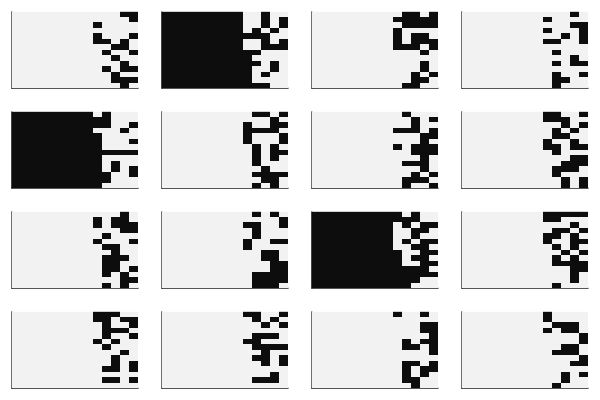

In [26]:
using Random
nsamples = 16
samples = []
for i in 1:nsamples
    reg = pprior()
    s = reg |> g |> measure
    push!(samples, convertgd(s))
end
plot([heatmap(reshape(s, compress_size, compress_size), color=:grays, colorbar = false, ticks = false) for s in samples]...) #Not sure if the reshaping is correct but whatever